In [22]:
import matplotlib.pylab as plt
import networkx as nx

In [16]:
with open('/home/vinhpham/Desktop/Datafile/hewitsoni_males.txt', 'r') as inFile:
    butterflyLoS = inFile.read().splitlines()
    butterflyLoL = []
    for record in butterflyLoS:
        butterflyLoL.append(record.split("\t"))
        

In [20]:
with open('butterflyEdgelist.txt', 'w') as outFile:
    for index in range(len(butterflyLoL)-1):
        if butterflyLoL[index][0] == butterflyLoL[index+1][0]:
            outFile.write("{}\t{}\t{}\n".format(butterflyLoL[index][0], butterflyLoL[index][1],\
                          butterflyLoL[index+1][1]))
    

In [ ]:
with open('butterflyEdgelist.txt', 'w') as outFile:
    for index in range(len(butterflyLoL)-1):
        if butterflyLoL[index][0] == butterflyLoL[index+1][0]:
            outFile.write("{1}\t[2]\t[0]\n".format(butterflyLoL[index][0], butterflyLoL[index][1],\
                          butterflyLoL[index+1][1]))

In [23]:
# there are different ways to generate a graph
# here we create one from an edgelist
G = nx.Graph()
edgelist=[('0','1'),('1','2'),('2','3'), ('3', '4'),\
         ('2', '4'), ('0', '2')]
for start, end in edgelist:
    # You can attach any attributes you want when adding the edge
    G.add_edge(start, end)

In [24]:
# first get the positions
# then use them for both nodes and labels.
pos = nx.spring_layout(G) # spring_layout seems to be popular in the documentation
nx.draw(G, pos = pos, node_size = 150) # node size and font size determine if print can be read

# do stuff to pos if you want offsets
nx.draw_networkx_labels(G, pos = pos, font_size = 12, with_labels = True)

{'0': <matplotlib.text.Text at 0x7fd05b043f60>,
 '1': <matplotlib.text.Text at 0x7fd0330867b8>,
 '2': <matplotlib.text.Text at 0x7fd03307f748>,
 '3': <matplotlib.text.Text at 0x7fd033086278>,
 '4': <matplotlib.text.Text at 0x7fd03307fcf8>}

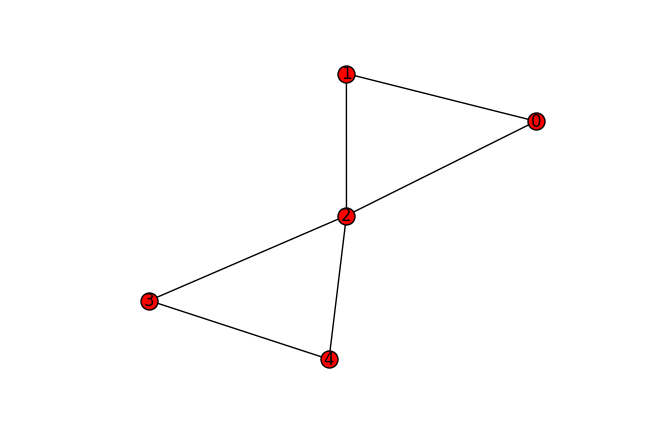

In [25]:
plt.show()

In [26]:
# let's use the networkx function to get the shortest path from one node to another
nx.shortest_path(G,'0', '4')

['0', '2', '4']

In [27]:
# let's get the neighbors of a node
for neighbor in nx.all_neighbors(G, '3'):
    print(neighbor)

2
4


In [29]:
# there are different measures of centrality: #degree is how many edge connected to the nodes, degree centrality: each node: how connect it is.
# degree, betweenness, and closeness
# nx.degree_centrality(G)
nx.betweenness_centrality(G)
#nx.closeness_centrality(G)


{'0': 0.0, '1': 0.0, '2': 0.6666666666666666, '3': 0.0, '4': 0.0}

In [2]:
"""
Zachary's Karate Club graph

Data file from:
http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/UciData.htm

Reference:
Zachary W. (1977).
An information flow model for conflict and fission in small groups.
Journal of Anthropological Research, 33, 452-473.
"""
import networkx as nx
G=nx.karate_club_graph()
print("Node Degree")
for v in G:
    print('{}\t{}'.format(v,G.degree(v)))

Node Degree
0	16
1	9
2	10
3	6
4	3
5	4
6	4
7	4
8	5
9	2
10	3
11	1
12	2
13	5
14	2
15	2
16	2
17	2
18	2
19	3
20	2
21	2
22	2
23	5
24	3
25	3
26	2
27	4
28	3
29	4
30	4
31	6
32	12
33	17


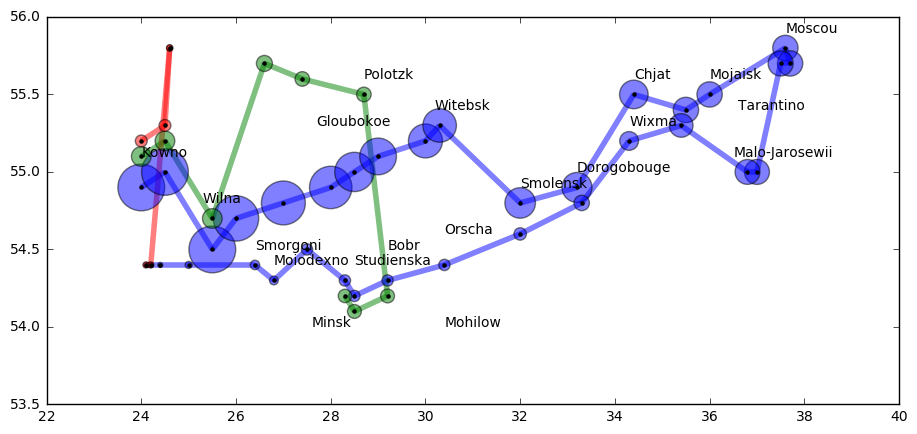

In [5]:
"""
Minard's data from Napoleon's 1812-1813  Russian Campaign.
http://www.math.yorku.ca/SCS/Gallery/minard/minard.txt

"""
# Author: Aric Hagberg (hagberg@lanl.gov)

#    Copyright (C) 2006-2016 by
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.

import string
import networkx as nx


def minard_graph():
    data1="""\
24.0,54.9,340000,A,1
24.5,55.0,340000,A,1
25.5,54.5,340000,A,1
26.0,54.7,320000,A,1
27.0,54.8,300000,A,1
28.0,54.9,280000,A,1
28.5,55.0,240000,A,1
29.0,55.1,210000,A,1
30.0,55.2,180000,A,1
30.3,55.3,175000,A,1
32.0,54.8,145000,A,1
33.2,54.9,140000,A,1
34.4,55.5,127100,A,1
35.5,55.4,100000,A,1
36.0,55.5,100000,A,1
37.6,55.8,100000,A,1
37.7,55.7,100000,R,1
37.5,55.7,98000,R,1
37.0,55.0,97000,R,1
36.8,55.0,96000,R,1
35.4,55.3,87000,R,1
34.3,55.2,55000,R,1
33.3,54.8,37000,R,1
32.0,54.6,24000,R,1
30.4,54.4,20000,R,1
29.2,54.3,20000,R,1
28.5,54.2,20000,R,1
28.3,54.3,20000,R,1
27.5,54.5,20000,R,1
26.8,54.3,12000,R,1
26.4,54.4,14000,R,1
25.0,54.4,8000,R,1
24.4,54.4,4000,R,1
24.2,54.4,4000,R,1
24.1,54.4,4000,R,1"""
    data2="""\
24.0,55.1,60000,A,2
24.5,55.2,60000,A,2
25.5,54.7,60000,A,2
26.6,55.7,40000,A,2
27.4,55.6,33000,A,2
28.7,55.5,33000,R,2
29.2,54.2,30000,R,2
28.5,54.1,30000,R,2
28.3,54.2,28000,R,2"""
    data3="""\
24.0,55.2,22000,A,3
24.5,55.3,22000,A,3
24.6,55.8,6000,A,3
24.6,55.8,6000,R,3
24.2,54.4,6000,R,3
24.1,54.4,6000,R,3"""
    cities="""\
24.0,55.0,Kowno
25.3,54.7,Wilna
26.4,54.4,Smorgoni
26.8,54.3,Moiodexno
27.7,55.2,Gloubokoe
27.6,53.9,Minsk
28.5,54.3,Studienska
28.7,55.5,Polotzk
29.2,54.4,Bobr
30.2,55.3,Witebsk
30.4,54.5,Orscha
30.4,53.9,Mohilow
32.0,54.8,Smolensk
33.2,54.9,Dorogobouge
34.3,55.2,Wixma
34.4,55.5,Chjat
36.0,55.5,Mojaisk
37.6,55.8,Moscou
36.6,55.3,Tarantino
36.5,55.0,Malo-Jarosewii"""

    c={}
    for line in cities.split('\n'):
        x,y,name=line.split(',')
        c[name]=(float(x),float(y))

    g=[]

    for data in [data1,data2,data3]:
        G=nx.Graph()
        i=0
        G.pos={} # location
        G.pop={} # size
        last=None
        for line in data.split('\n'):
            x,y,p,r,n=line.split(',')
            G.pos[i]=(float(x),float(y))
            G.pop[i]=int(p)
            if last is None:
                last=i
            else:
                G.add_edge(i,last,{r:int(n)})
                last=i
            i=i+1
        g.append(G)

    return g,c

if __name__ == "__main__":

    (g,city)=minard_graph()

    try:
        import matplotlib.pyplot as plt
        plt.figure(1,figsize=(11,5))
        plt.clf()
        colors=['b','g','r']
        for G in g:
            c=colors.pop(0)
            node_size=[int(G.pop[n]/300.0) for n in G]
            nx.draw_networkx_edges(G,G.pos,edge_color=c,width=4,alpha=0.5)
            nx.draw_networkx_nodes(G,G.pos,node_size=node_size,node_color=c,alpha=0.5)
            nx.draw_networkx_nodes(G,G.pos,node_size=5,node_color='k')

        for c in city:
            x,y=city[c]
            plt.text(x,y+0.1,c)
        #plt.savefig("napoleon_russian_campaign.png")
        plt.show()
    except ImportError:
        pass

In [11]:
"""
Words/Ladder Graph
------------------
Generate  an undirected graph over the 5757 5-letter words in the
datafile words_dat.txt.gz.  Two words are connected by an edge
if they differ in one letter, resulting in 14,135 edges. This example
is described in Section 1.1 in Knuth's book [1]_,[2]_.

References
----------
.. [1] Donald E. Knuth,
   "The Stanford GraphBase: A Platform for Combinatorial Computing",
   ACM Press, New York, 1993.
.. [2] http://www-cs-faculty.stanford.edu/~knuth/sgb.html
"""
# Authors: Aric Hagberg (hagberg@lanl.gov),
#          Brendt Wohlberg,
#          hughdbrown@yahoo.com

#    Copyright (C) 2004-2016 by
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.

import networkx as nx

#-------------------------------------------------------------------
#   The Words/Ladder graph of Section 1.1
#-------------------------------------------------------------------
def generate_graph(words):
    from string import ascii_lowercase as lowercase
    G = nx.Graph(name="words")
    lookup = dict((c,lowercase.index(c)) for c in lowercase)
    def edit_distance_one(word):
        for i in range(len(word)):
            left, c, right = word[0:i], word[i], word[i+1:]
            j = lookup[c] # lowercase.index(c)
            for cc in lowercase[j+1:]:
                yield left + cc + right
    candgen = ((word, cand) for word in sorted(words)
               for cand in edit_distance_one(word) if cand in words)
    G.add_nodes_from(words)
    for word, cand in candgen:
        G.add_edge(word, cand)
    return G

def words_graph():
    """Return the words example graph from the Stanford GraphBase"""
    fh=open('/home/james/python/notebooks/sgb-words.txt','r')
    words=set()
    for line in fh.readlines():
        if line.startswith('*'):
            continue
        w=str(line[0:5])
        words.add(w)
    return generate_graph(words)

if __name__ == '__main__':
    from networkx import *
    G=words_graph()
    print("Loaded words_dat.txt containing 5757 five-letter English words.")
    print("Two words are connected if they differ in one letter.")
    print("Graph has %d nodes with %d edges"
          %(number_of_nodes(G),number_of_edges(G)))
    print("%d connected components" % number_connected_components(G))

    for (source,target) in [('chaos','order'),
                            ('nodes','graph'),
                            ('pound','marks')]:
        print("Shortest path between {} and {} is".format(source,target))
        try:
            sp=shortest_path(G, source, target)
            for n in sp:
                print(n)
        except nx.NetworkXNoPath:
            print("None")

Loaded words_dat.txt containing 5757 five-letter English words.
Two words are connected if they differ in one letter.
Graph has 5757 nodes with 14135 edges
853 connected components
Shortest path between chaos and order is
chaos
chats
coats
colts
colas
codas
codes
coder
cider
aider
alder
older
order
Shortest path between nodes and graph is
nodes
lodes
lores
lords
loads
goads
grads
grade
grape
graph
Shortest path between pound and marks is
None
